# Credit Default Risk

Este notebook serve para fazer os exercícios do livro Projetos de Ciência de Dados com Python, especificamente do capítulo 2 - Exploração e Limpeza de dados


**O desafio da empresa**

A empresa de cartão de crédito disponibilizou um dataset com dados demográficos e financeiros dos últimos 6 meses de uma amostra de 30.000 titulares de contas. Há uma linha para cada conta e as linhas são rotuladas de acordo com se no mês seguinte ao período de dados histórico de seis meses um proprietário de conta ficou inadimplente, ou seja, não fez o pagamento mínimo

**Objetivo**

Desenvolver um algoritmo que consiga prever se uma conta ficará inadimplente no próximo mês com base no conjunto de dados.


# Dicionário dos Dados



| **Coluna**     | **Descrição**                                                                                                                                       |
|----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| **LIMIT_BAL**  | Montante do crédito concedido (em dólar taiwanês): inclui tanto o crédito individual do consumidor quanto o crédito da sua família (suplementar).     |
| **SEX**        | Gênero (1 = masculino; 2 = feminino). **Nota:** Não usarei os dados de gênero para tomar decisões devido a considerações éticas.                     |
| **EDUCATION**  | Educação (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).                                                                        |
| **MARRIAGE**   | Estado civil (1 = casado; 2 = solteiro; 3 = outros).                                                                                                 |
| **AGE**        | Idade (anos).                                                                                                                                        |
| **PAY_1-PAY_6**| Histórico de pagamento passado. Foram rastreados os registros mensais de pagamento passado (de abril a setembro de 2005) da seguinte forma: <br> PAY_1 = status de pagamento em setembro de 2005; <br> PAY_2 = status de pagamento em agosto de 2005; <br> ...; PAY_6 = status de pagamento em abril de 2005. <br> A escala de medição para o status de pagamento é: <br> -1 = pago pontualmente; 1 = atraso de pagamento por um mês; <br> 2 = atraso de pagamento por dois meses; ...; <br> 8 = atraso de pagamento por oito meses; 9 = atraso de pagamento por nove meses ou mais. |
| **BILL_AMT1-BILL_AMT6** | Valor da fatura (em dólar taiwanês). <br> BILL_AMT1 representa o valor da fatura em setembro; <br> BILL_AMT2 representa o valor da fatura em agosto; <br> e assim por diante até BILL_AMT7, que representa o valor pago em abril. |
| **Explicações adicionais das colunas feitas pelo sócio da empresa** | -2: Significa que começou o mês sem valor a ser pago e o crédito não foi usado. <br> -1: Significa que usou um valor que foi totalmente pago. <br> 0: Significa que o pagamento mínimo foi feito, mas o saldo total devedor não foi pago. |

# 0.0 IMPORTS

In [ ]:
# Import Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Display options.
pd.set_option('display.max_columns', None)

In [ ]:
URL = 'https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/raw/master/Data/Chapter_1_cleaned_data.csv'
df = pd.read_csv( URL )

# Capítulo 4: O trade-off entre viés e variância

In [ ]:
X_poly = np.linspace( -3, 5, 81 )
print(X_poly[:5], '...', X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


Text(0.5, 1.0, 'Error surface')

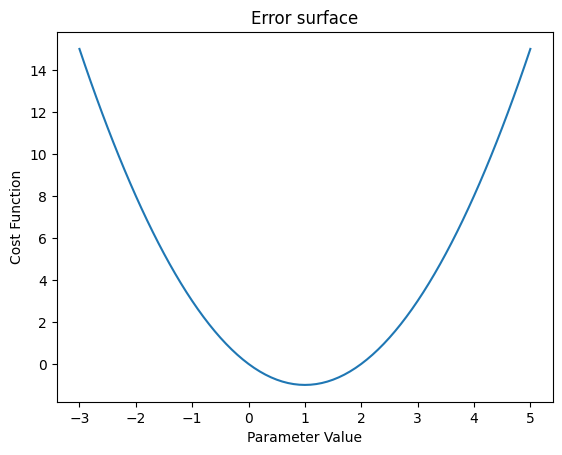

In [ ]:
def cost_function(X):
  return X * (X - 2)

y_poly = cost_function(X_poly)
plt.plot(X_poly, y_poly)
plt.xlabel( 'Parameter Value')
plt.ylabel( 'Cost Function')
plt.title( 'Error surface')

## Exercício 16: Usando o gradiente descendente para reduzir a função custo

Reduzindo a função custo hipotética com gradiente descendente
( y = f(x) = x**2 - 2x )

In [ ]:
def gradient(X):
  return (2*X) - 2
x_start = 4.5
learning_rate = 0.75
x_next = x_start - gradient( x_start)*learning_rate
x_next

-0.75

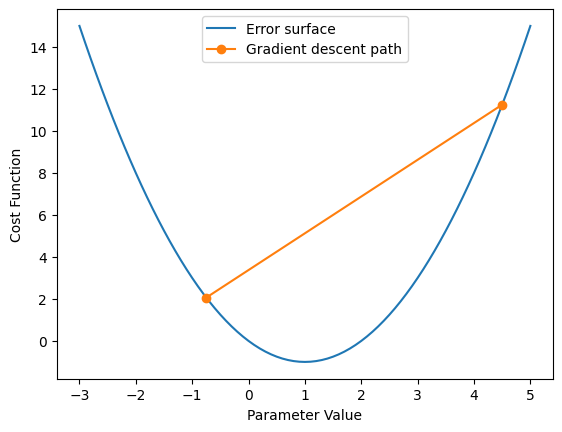

In [ ]:
plt.plot( X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)], '-o')
plt.xlabel( 'Parameter Value')
plt.ylabel( 'Cost Function')
plt.legend(['Error surface', 'Gradient descent path'])

In [ ]:
iterations = 15
x_path = np.empty( iterations,)
x_path[0] = x_start
for iteration_count in range(1, iterations):
  derivative = gradient(x_path[iteration_count - 1])
  x_path[iteration_count] = x_path[iteration_count-1] - (derivative*learning_rate)

x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

chegamos perto (1.00021362) da solução ótima (1)

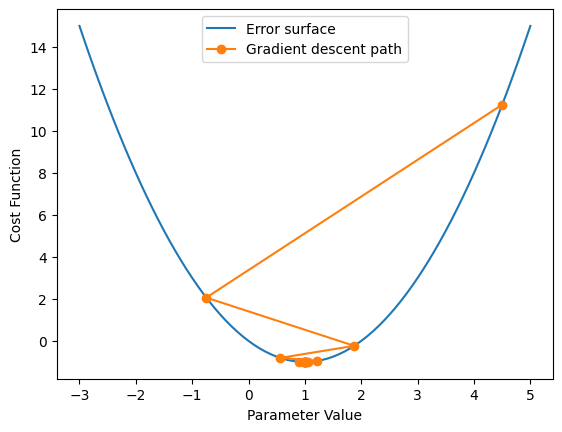

In [ ]:
# caminho do gradiente descendente
plt.plot( X_poly, y_poly)
plt.plot(x_path, cost_function(x_path), '-o')
plt.xlabel( 'Parameter Value')
plt.ylabel( 'Cost Function')
plt.legend(['Error surface', 'Gradient descent path'])

## Suposições de regressão logística

- As características são lineares no logaritmo das chances (capitulo 3)
- Não há multicolinearidade de características
- Independência das observações
- Nâo há valores atípicos
-

<Axes: >

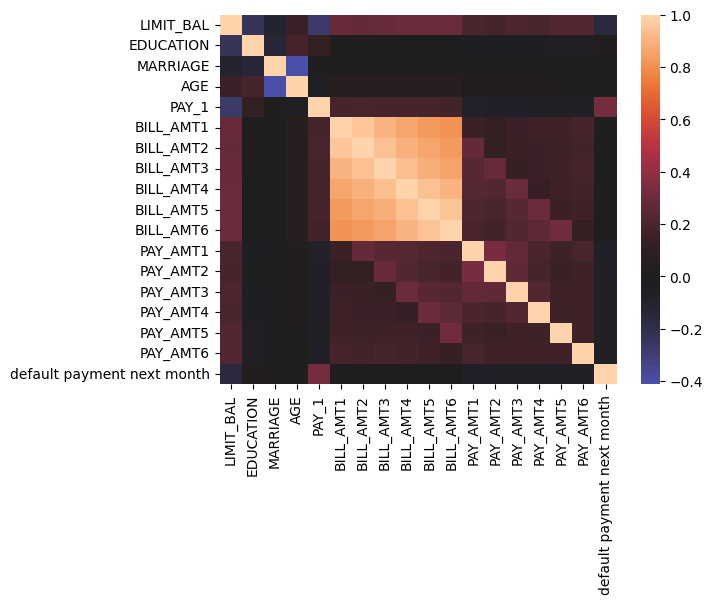

In [ ]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'none', 'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
corr = df[features_response].corr()
sns.heatmap( corr, xticklabels=corr.columns, yticklabels=corr.columns, center=0)

## O trade-off entre viés e variância

O overfitting tem mais probabilidade de ocorrer quando há:
- Número maior de características em relação ao numero de amostras
- Modelos complexos

## Exercício 17: Gerando e modelando dados de classificação sintéticos

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
X_synthetic, y_synthetic = make_classification( n_samples=1000,
                                               n_features=200, n_informative=3,
                                                n_redundant=10, n_classes=2,
                                                n_clusters_per_class=2, weights=None,
                                                flip_y=0.01, class_sep=0.8, hypercube=True,
                                                shift=0.0, scale=1.0, shuffle=True,
                                                random_state=24)


In [ ]:
print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


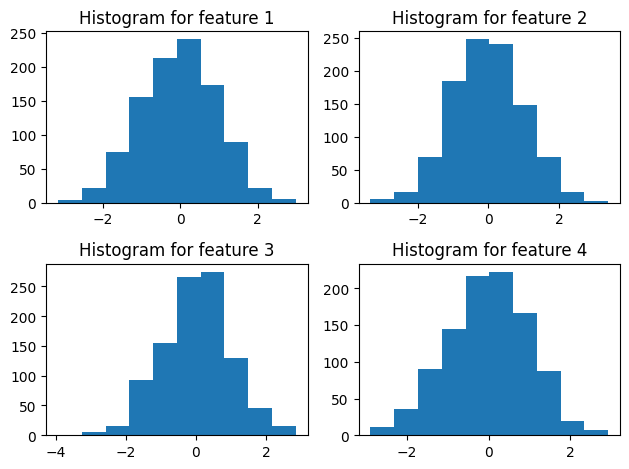

In [ ]:
for plot_index in range(4):
  plt.subplot(2,2,plot_index+1)
  plt.hist(X_synthetic[:,plot_index])
  plt.title('Histogram for feature {}'.format(plot_index+1))
plt.tight_layout()

In [ ]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
X_synthetic, y_synthetic,
test_size=0.2, random_state=24)

lr_syn = LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [ ]:
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [ ]:
# obtendo as probabilidades
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)

In [ ]:
# encontrando a ROC AUC
roc_auc_score( y_syn_train, y_syn_train_predict_proba[:,1])

0.9420000000000001

In [ ]:
y_syn_test_predict_proba = lr_syn.predict_proba( X_syn_test )
roc_auc_score( y_syn_test, y_syn_test_predict_proba[:,1])

0.8075807580758075

A partir desses resultados, fica claro que o modelo de regressão logística sobreajustou os dados. Isto é, o resultado da ROC AUC com os dados de treinamento é substancialmente maior que o dos dados de teste.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [ ]:
n_folds = 4
k_folds = KFold(n_splits=n_folds, shuffle=False) # sem embaralhamento

In [ ]:
for train_index, test_index in k_folds_iterator.split(X_syn_train, y_syn_train):

SyntaxError: incomplete input (<ipython-input-21-ebd4078e2f76>, line 1)

In [ ]:
# Divisões estratificadas
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=False)

In [ ]:
# Para “distribuir” os índices de linhas de um dataset por todos os folds,
# temos apenas de configurar o parâmetro shuffle com True
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)

## Exercício 18: Reduzindo o overfitting no problema de classiycação de dados sintéticos

In [ ]:
C_val_exponents = np.linspace(3, -3, 13)
C_val_exponents

In [ ]:
# variando C de acordo com as potências de 10, desta forma:
# Geralmente é uma boa ideia variar o parâmetro de regularização de
# acordo com potências de 10, ou usando uma estratégia semelhante, já
# que treinar modelos pode demorar muito
C_vals = np.float64(10)**C_val_exponents

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def cross_val_C_search(n_folds, C_vals, model, X, Y):
    k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
    cv_train_roc_auc = np.empty((len(C_vals), n_folds))
    cv_test_roc_auc = np.empty((len(C_vals), n_folds))
    cv_test_roc = [[] for _ in range(len(C_vals))]

    for c_val_counter, C in enumerate(C_vals):
        model.C = C

        for fold_counter, (train_index, test_index) in enumerate(k_folds.split(X, Y)):
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            model.fit(X_cv_train, y_cv_train)

            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc[c_val_counter, fold_counter] = roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            cv_test_roc_auc[c_val_counter, fold_counter] = roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

        print(f'Done with C = {C:.4f}')

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

# Definindo os valores de C usando np.logspace
C_vals = np.logspace(3, -3, num=13)

# Chamada da função
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search(n_folds, C_vals, lr_syn, X_syn_train, y_syn_train)


 O scikit-learn oferece
uma funcionalidade que facilita esse processo; estamos falando do
procedimento sklearn.model_selection.GridSearchCV, que aplica a
validação cruzada à busca de hiperparâmetros em uma grade

In [ ]:
# Plotando os resultados
C_val_exponents = np.log10(C_vals)

plt.figure(figsize=(12, 8))
for this_fold in range(n_folds):
    plt.plot(C_val_exponents, cv_train_roc_auc[:, this_fold], '-o', label=f'Train Fold {this_fold+1}')
    plt.plot(C_val_exponents, cv_test_roc_auc[:, this_fold], '-x', label=f'Test Fold {this_fold+1}')

plt.xlabel('log10(C)')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs C value for different folds')
plt.legend()
plt.xticks(C_val_exponents, [f'{c:.3f}' for c in C_vals], rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Plotando as médias
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=1), '-o',
         color='black', linewidth=2, label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=1), '-x',
         color='black', linewidth=2, label='Average testing score')

plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Cross validation scores averaged over all folds')

In [ ]:
best_C_val_bool = C_val_exponents == -1.5
best_C_val_bool.astype(int)

In [ ]:
best_C_val_ix = np.nonzero(best_C_val_bool.astype(int))
best_C_val_ix[0][0]

In [ ]:
for this_fold in range(n_folds):
  fpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][0]
  tpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][1]
  plt.plot(fpr, tpr, label='Fold {}'.format(this_fold+1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for each fold at C = $10^{-1.5}$')
plt.legend()

In [ ]:
lr_syn.C = 10**(-1.5)
lr_syn.fit(X_syn_train, y_syn_train)

In [ ]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

In [ ]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

In [ ]:
# Acessando os coeÂcientes do modelo treinado e determine quantos não são iguais a zero
sum((lr_syn.coef_ != 0)[0])

In [ ]:
lr_syn.intercept_

## Escalonamento de dados, pipelines e características de interação no scikit-learn

Uma maneira simples de assegurar que todas as características tenham a mesma escala é fazê-las passar pela transformação
de diminuição do valor mínimo e divisão pelo intervalo do valor mínimo
ao valor máximo. Isso transformará cada característica para que ela tenha
um mínimo igual a 0 e um máximo igual a 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()

**Pipelines**

In [ ]:
from sklearn.pipeline import Pipeline
scale_lr_pipeline = Pipeline(steps=[( 'scale', min_max_sc), ( 'model', lr )])

In [ ]:
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

## Atividade 4: Validação cruzada e engenharia de características com os dados do estudo de caso

In [ ]:
features = features_response[:-1]
features

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
len(features)

17

In [ ]:
X = df[features].values

In [ ]:
X.shape

(26664, 17)

In [ ]:
# Criando divisão de treinamento/teste
X_train, X_test, y_train, y_test = train_test_split(X, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(21331, 17)
(5333, 17)


In [ ]:
# Escalonando os dados
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()

Logo, precisamos nos certificar de
escalonar os dados. Essa também é uma boa ideia sempre que executarmos a regularização para que todas as características estejam na
mesma escala e sejam igualmente penalizadas pelo processo deregularização.

In [ ]:
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)

In [ ]:
lr

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
scale_lr_pipeline = Pipeline(steps=[('scale', min_max_sc), ('model', lr)])

In [ ]:
# Visualizando os parâmetros de cada estágio do pipeline
scale_lr_pipeline.get_params()

In [ ]:
# Intervalos de C para testar com a validação cruzada
C_val_exponents = np.linspace(2,-3,6)
C_val_exponents

array([ 2.,  1.,  0., -1., -2., -3.])

In [ ]:
C_vals = np.float64(10)**C_val_exponents
C_vals

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
#
def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X, Y):

    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)

    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        pipeline.set_params(model__C = C_vals[c_val_counter])
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            pipeline.fit(X_cv_train, y_cv_train)

            #Get the training ROC AUC
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the testing ROC AUC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(pipeline.get_params()['model__C']))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [5]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)

NameError: name 'k_folds' is not defined

Text(0.5, 1.0, 'Cross validation on Case Study problem')

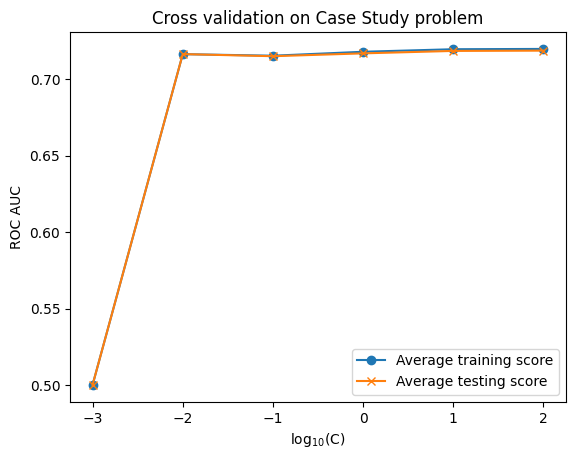

In [ ]:
# Plotando a ROC AUC da média de treinamento e teste entre os folds para cada valor de C
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation on Case Study problem')

In [ ]:
np.mean(cv_test_roc_auc, axis=0)

array([0.71874801, 0.71857009, 0.7169685 , 0.7151127 , 0.7164791 ,
       0.5       ])

Não parece que o Overfitting esteja ocorrendo. Nosso modelo pode estar se ajustando mal. Vamos tentar criar alguns novos recursos para ver se conseguimos melhorar o desempenho

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interact = make_interactions.fit_transform(X)

In [ ]:
X_interact.shape

(26664, 153)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X_interact, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(21331, 153)
(5333, 153)


In [ ]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)

Text(0.5, 1.0, 'Cross validation on Case Study problem')

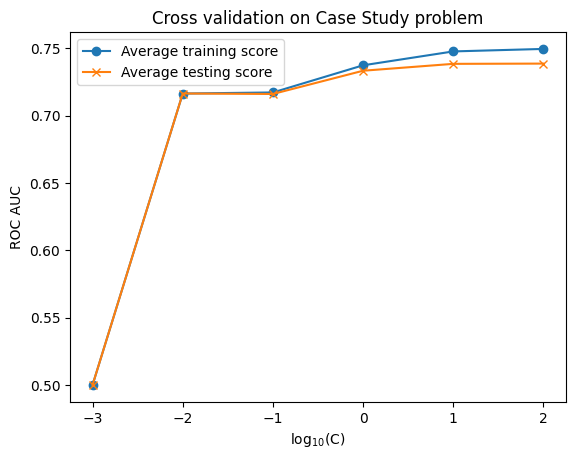

In [ ]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation on Case Study problem')

In [ ]:
np.mean(cv_test_roc_auc, axis=0)

array([0.73869482, 0.73850716, 0.73339435, 0.71612838, 0.71647887,
       0.5       ])